In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from pandas import read_csv
df = read_csv('Fish.csv')
df.head(2)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.52,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.48,4.3056


Species: species name of fish
Weight: weight(gr) of fish in Gram g
Length1: Vertical_length(cm) in cm with fins 
Length2: Length(cm) in cm with tail
Length3: Diagonal_length(cm) in cm
Height: Height(cm) in cm
Width:  Width(cm) in cm
These Height and Width are measured without fins

In [ ]:
df.rename(columns={'Length1':'Vertical_length(cm)', 'Length2':'Length(cm)', 'Length3':'Diagonal_length(cm)', 'Weight' : 'Weight(gr)', 'Height' : 'Height(cm)' , 'Width' : 'Width(cm)'}, inplace=True)
df.head(5)

,Species,Weight(gr),Vertical_length(cm),Length(cm),Diagonal_length(cm),Height(cm),Width(cm)
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
X= df[['Weight(gr)','Vertical_length(cm)','Length(cm)','Diagonal_length(cm)','Height(cm)','Width(cm)']]
y= df[['Species']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.30, random_state=42)

In [ ]:
accuracy_rate=[]

for i in range(1,40):
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  accuracy_rate.append(knn.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was

Text(0, 0.5, 'accuracy_rate')

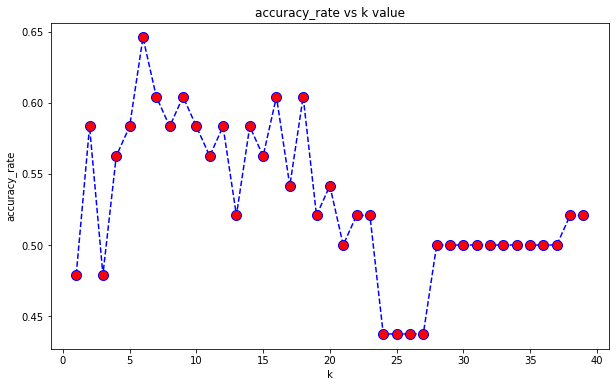

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), accuracy_rate , color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy_rate vs k value')
plt.xlabel(' k ')
plt.ylabel('accuracy_rate')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [ ]:
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[12  0  1  0  0  0  0]
 [ 0  0  3  0  0  0  0]
 [ 0  2 11  0  1  0  0]
 [ 3  1  1  0  0  0  0]
 [ 0  0  2  0  2  0  0]
 [ 0  0  0  0  0  6  0]
 [ 0  0  3  0  0  0  0]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       Bream       0.80      0.92      0.86        13
      Parkki       0.00      0.00      0.00         3
       Perch       0.52      0.79      0.63        14
        Pike       0.00      0.00      0.00         5
       Roach       0.67      0.50      0.57         4
       Smelt       1.00      1.00      1.00         6
   Whitefish       0.00      0.00      0.00         3

    accuracy                           0.65        48
   macro avg       0.43      0.46      0.44        48
weighted avg       0.55      0.65      0.59        48



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
accuracy_rate=[]

for i in range(1,40):

  knn=KNeighborsClassifier(n_neighbors= i)
  score=cross_val_score(knn,X,y,cv=10)
  accuracy_rate.append(score.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sampl

Text(0, 0.5, 'accuracy_rate')

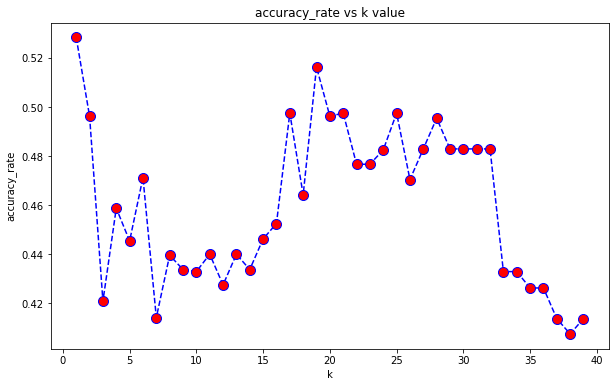

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), accuracy_rate , color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy_rate vs k value')
plt.xlabel(' k ')
plt.ylabel('accuracy_rate')

In [ ]:
knn=KNeighborsClassifier(n_neighbors= 19)
score=cross_val_score(knn,X,y,cv=10)
print(score.mean())

0.51625


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sampl

In [ ]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=10)
knn=KNeighborsClassifier(n_neighbors= 19)
scores=cross_val_score(knn,X,y,cv=skfold)
print(np.mean(scores))

0.51625


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sampl

In [ ]:
from sklearn.model_selection import LeaveOneOut
knn=KNeighborsClassifier(n_neighbors= 19)
leave_validation=LeaveOneOut()
results=cross_val_score(knn,X,y,cv=leave_validation)
print(np.mean(results))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

0.5031446540880503


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

In [ ]:
from sklearn.model_selection import ShuffleSplit
knn=KNeighborsClassifier(n_neighbors= 19)
ssplit=ShuffleSplit(n_splits=10,test_size=0.30,random_state=42)
results=cross_val_score(knn,X,y,cv=ssplit)
print(np.mean(results))

0.49375


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

In [ ]:
from sklearn import svm
model = svm.SVC(kernel='linear',C=10,gamma= 'auto')
model.fit(X,y)
model.score(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(), {
    'C': [1,10,20,30,35,40],
    'kernel': ['linear'],
    'gamma': ['auto'],
    'degree' : [3,4,5]
}, cv=10)
clf.fit(X,y)
clf.cv_results_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

{'mean_fit_time': array([0.43495884, 0.43564029, 0.43181016, 0.35691032, 0.35059953,
        0.351983  , 0.48786323, 0.49232759, 0.49512341, 0.47472398,
        0.46898429, 0.47225125, 0.47551763, 0.47951341, 0.47935743,
        0.48356285, 0.47970743, 0.47918799]),
 'mean_score_time': array([0.00163805, 0.00142214, 0.00161934, 0.00167019, 0.00138924,
        0.00162268, 0.00161853, 0.00150023, 0.00157406, 0.0016171 ,
        0.00141661, 0.00140994, 0.00174074, 0.00163758, 0.00151327,
        0.0017144 , 0.00142341, 0.00137861]),
 'mean_test_score': array([0.91791667, 0.91791667, 0.91791667, 0.93708333, 0.93708333,
        0.93708333, 0.93708333, 0.93708333, 0.93708333, 0.94333333,
        0.94333333, 0.94333333, 0.94333333, 0.94333333, 0.94333333,
        0.94333333, 0.94333333, 0.94333333]),
 'param_C': masked_array(data=[1, 1, 1, 10, 10, 10, 20, 20, 20, 30, 30, 30, 35, 35,
                    35, 40, 40, 40],
              mask=[False, False, False, False, False, False, False, False

In [ ]:
newdf = pd.DataFrame(clf.cv_results_)
newdf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.434959,0.186018,0.001638,0.000184,1,3,auto,linear,"{'C': 1, 'degree': 3, 'gamma': 'auto', 'kernel...",0.5625,1.0,0.9375,1.0,1.0,0.9375,0.9375,1.0000,0.9375,0.866667,0.917917,0.125472,16
1,0.435640,0.191985,0.001422,0.000150,1,4,auto,linear,"{'C': 1, 'degree': 4, 'gamma': 'auto', 'kernel...",0.5625,1.0,0.9375,1.0,1.0,0.9375,0.9375,1.0000,0.9375,0.866667,0.917917,0.125472,16
2,0.431810,0.185218,0.001619,0.000172,1,5,auto,linear,"{'C': 1, 'degree': 5, 'gamma': 'auto', 'kernel...",0.5625,1.0,0.9375,1.0,1.0,0.9375,0.9375,1.0000,0.9375,0.866667,0.917917,0.125472,16
3,0.356910,0.067564,0.001670,0.000263,10,3,auto,linear,"{'C': 10, 'degree': 3, 'gamma': 'auto', 'kerne...",0.6250,1.0,0.9375,1.0,1.0,1.0000,1.0000,0.9375,0.9375,0.933333,0.937083,0.108260,10
4,0.350600,0.065890,0.001389,0.000110,10,4,auto,linear,"{'C': 10, 'degree': 4, 'gamma': 'auto', 'kerne...",0.6250,1.0,0.9375,1.0,1.0,1.0000,1.0000,0.9375,0.9375,0.933333,0.937083,0.108260,10
5,0.351983,0.064941,0.001623,0.000275,10,5,auto,linear,"{'C': 10, 'degree': 5, 'gamma': 'auto', 'kerne...",0.6250,1.0,0.9375,1.0,1.0,1.0000,1.0000,0.9375,0.9375,0.933333,0.937083,0.108260,10
6,0.487863,0.122334,0.001619,0.000275,20,3,auto,linear,"{'C': 20, 'degree': 3, 'gamma': 'auto', 'kerne...",0.6250,1.0,0.9375,1.0,1.0,1.0000,1.0000,0.9375,0.9375,0.933333,0.937083,0.108260,10
7,0.492328,0.126122,0.001500,0.000114,20,4,auto,linear,"{'C': 20, 'degree': 4, 'gamma': 'auto', 'kerne...",0.6250,1.0,0.9375,1.0,1.0,1.0000,1.0000,0.9375,0.9375,0.933333,0.937083,0.108260,10
8,0.495123,0.124859,0.001574,0.000240,20,5,auto,linear,"{'C': 20, 'degree': 5, 'gamma': 'auto', 'kerne...",0.6250,1.0,0.9375,1.0,1.0,1.0000,1.0000,0.9375,0.9375,0.933333,0.937083,0.108260,10
9,0.474724,0.114903,0.001617,0.000316,30,3,auto,linear,"{'C': 30, 'degree': 3, 'gamma': 'auto', 'kerne...",0.6250,1.0,0.9375,1.0,1.0,1.0000,1.0000,1.0000,0.9375,0.933333,0.943333,0.109896,1


In [ ]:
newdf[['param_C','param_kernel', 'param_degree', 'param_gamma','mean_test_score']]

,param_C,param_kernel,param_degree,param_gamma,mean_test_score
0,1,linear,3,auto,0.917917
1,1,linear,4,auto,0.917917
2,1,linear,5,auto,0.917917
3,10,linear,3,auto,0.937083
4,10,linear,4,auto,0.937083
5,10,linear,5,auto,0.937083
6,20,linear,3,auto,0.937083
7,20,linear,4,auto,0.937083
8,20,linear,5,auto,0.937083
9,30,linear,3,auto,0.943333


In [ ]:
clf.best_params_

{'C': 30, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}

In [ ]:
clf.best_score_

0.9433333333333334

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.30, random_state=42)

In [ ]:
model = svm.SVC(kernel='linear',C=30,gamma= 'auto',degree=3)
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=30, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[13  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0 14  0  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  6  0]
 [ 0  0  0  0  2  0  1]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        13
      Parkki       1.00      1.00      1.00         3
       Perch       1.00      1.00      1.00        14
        Pike       1.00      1.00      1.00         5
       Roach       0.67      1.00      0.80         4
       Smelt       1.00      1.00      1.00         6
   Whitefish       1.00      0.33      0.50         3

    accuracy                           0.96        48
   macro avg       0.95      0.90      0.90        48
weighted avg       0.97      0.96      0.95        48



In [ ]:
model = svm.SVC(kernel='linear',C=30,gamma= 'auto',degree=3)
score=cross_val_score(model,X,y,cv=10)
print(score.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

0.9433333333333334


In [ ]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=10)
model = svm.SVC(kernel='linear',C=30,gamma= 'auto',degree=3)
scores=cross_val_score(model,X,y,cv=skfold)
print(np.mean(scores))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

0.9433333333333334


In [ ]:
from sklearn.model_selection import LeaveOneOut
model = svm.SVC(kernel='linear',C=30,gamma= 'auto',degree=3)
leave_validation=LeaveOneOut()
results=cross_val_score(model,X,y,cv=leave_validation)
print(np.mean(results))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

0.9685534591194969


In [ ]:
from sklearn.model_selection import ShuffleSplit
model = svm.SVC(kernel='linear',C=30,gamma= 'auto',degree=3)
ssplit=ShuffleSplit(n_splits=10,test_size=0.30,random_state=42)
results=cross_val_score(model,X,y,cv=ssplit)
print(np.mean(results))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

0.9583333333333334


In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=10,verbose=2,
                               random_state=100,n_jobs=-1)

rf_randomcv.fit(X,y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 24.2min finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [ ]:
rf_randomcv.best_params_

{'criterion': 'entropy',
 'max_depth': 120,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1400}

In [ ]:
rf_randomcv

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [ ]:
best_random_grid=rf_randomcv.best_estimator_

In [ ]:
rf_randomcv.best_params_

{'criterion': 'entropy',
 'max_depth': 120,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1400}

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [120], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [0, 1, 2, 3, 4], 'n_estimators': [1200, 1300, 1400, 1500, 1600]}


In [ ]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X,y)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 16.8min finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=120, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
best_grid=grid_search.best_estimator_

In [ ]:
best_grid

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=120, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.30, random_state=42)

In [ ]:
model=best_grid
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=120, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[13  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0 12  0  2  0  0]
 [ 0  0  1  4  0  0  0]
 [ 0  0  3  0  1  0  0]
 [ 0  0  0  0  0  6  0]
 [ 0  0  1  0  2  0  0]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        13
      Parkki       1.00      1.00      1.00         3
       Perch       0.71      0.86      0.77        14
        Pike       1.00      0.80      0.89         5
       Roach       0.20      0.25      0.22         4
       Smelt       1.00      1.00      1.00         6
   Whitefish       0.00      0.00      0.00         3

    accuracy                           0.81        48
   macro avg       0.70      0.70      0.70        48
weighted avg       0.79      0.81      0.80        48



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import cross_val_score
model=best_grid
score=cross_val_score(model,X,y,cv=10)
print(score.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

0.6912499999999999


In [ ]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=10)
model=best_grid
scores=cross_val_score(model,X,y,cv=skfold)
print(np.mean(scores))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

0.67875


In [ ]:
from sklearn.model_selection import LeaveOneOut
model=best_grid
leave_validation=LeaveOneOut()
results=cross_val_score(model,X,y,cv=leave_validation)
print(np.mean(results))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

0.7672955974842768


In [ ]:
from sklearn.model_selection import ShuffleSplit
model=best_grid
ssplit=ShuffleSplit(n_splits=10,test_size=0.30,random_state=42)
results=cross_val_score(model,X,y,cv=ssplit)
print(np.mean(results))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

0.7625
